In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv' , encoding='latin-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
print("Dataset Shape:", df.shape)

Dataset Shape: (541909, 8)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [52]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [20]:
df = df.dropna(subset='CustomerID')

In [21]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
df.duplicated().sum()

5225

In [23]:
duplicates = df[df.duplicated()]
print(duplicates)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [24]:

duplicate_line_items = df.duplicated(subset=['InvoiceNo', 'StockCode']).sum()
print(f"Duplicate line items (same product in same invoice): {duplicate_line_items}")

Duplicate line items (same product in same invoice): 10148


In [25]:
if duplicate_line_items > 0:
    duplicates = df[df.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]
    print(duplicates[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].head())

    InvoiceNo StockCode                      Description  Quantity
113    536381     71270                  PHOTO CLIP LINE         1
125    536381     71270                  PHOTO CLIP LINE         3
483    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         3
485    536409     22111     SCOTTIE DOG HOT WATER BOTTLE         1
489    536409     22866    HAND WARMER SCOTTY DOG DESIGN         1


In [26]:
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode'], keep='first')
print(f"Removed {duplicate_line_items} duplicate line items")

Removed 10148 duplicate line items


In [27]:
if duplicate_line_items > 0:
    duplicates = df[df.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]
    print(duplicates[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].head())

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity]
Index: []


In [28]:
df = df[df["Quantity"] > 0]

In [29]:
df = df[df["UnitPrice"] > 0]

In [30]:
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (387839, 8)


# Let's start with the EDA process.

In [31]:
print("Unique customers:", df["CustomerID"].nunique())

Unique customers: 4338


In [32]:
print("Unique products:", df["StockCode"].nunique())

Unique products: 3665


In [33]:
# Top Products.

In [35]:
top_products = df['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    1971
REGENCY CAKESTAND 3 TIER              1703
JUMBO BAG RED RETROSPOT               1600
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1375
Name: count, dtype: int64

In [36]:
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1971
REGENCY CAKESTAND 3 TIER              1703
JUMBO BAG RED RETROSPOT               1600
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1375
Name: count, dtype: int64


AttributeError: module 'matplotlib' has no attribute 'title'

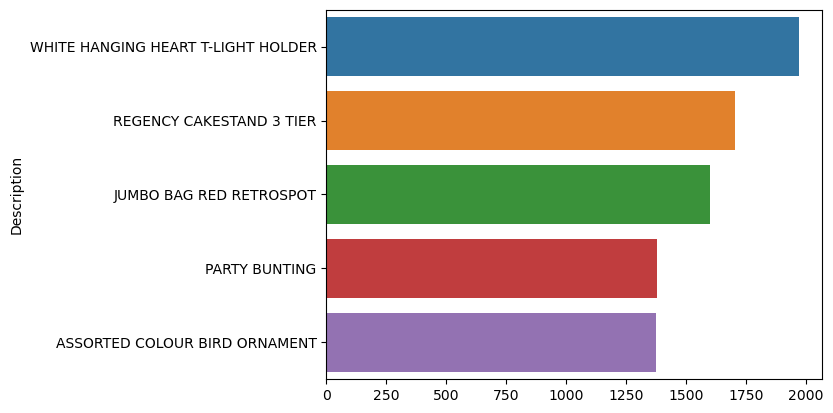

In [37]:
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product")
plt.show()

C:\Users\Jitendra Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'matplotlib' has no attribute 'title'

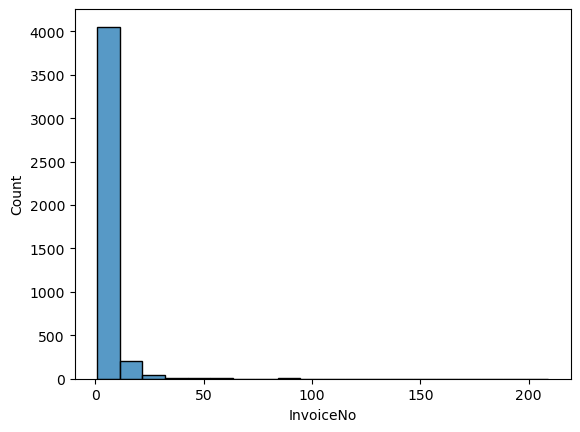

In [42]:
cust_freq = df.groupby("CustomerID")["InvoiceNo"].nunique()
sns.histplot(cust_freq, bins=20, kde=False)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")

# Focus on where most data is (probably 0-50)
plt.xlim(0, 50)
plt.xticks(range(0, 51, 5))  # Every 5 from 0 to 50

plt.show()

In [39]:
cust_freq

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

In [44]:
unique_purchases = df.groupby("CustomerID")["InvoiceNo"].nunique()

In [47]:
unique_purchases

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

In [48]:
print("Purchase frequency statistics:")
print(f"Min purchases: {unique_purchases.min()}")
print(f"Max purchases: {unique_purchases.max()}")
print(f"Mean purchases: {unique_purchases.mean():.2f}")
print(f"Median purchases: {unique_purchases.median()}")
print(f"Total unique customers: {len(unique_purchases)}")

Purchase frequency statistics:
Min purchases: 1
Max purchases: 209
Mean purchases: 4.27
Median purchases: 2.0
Total unique customers: 4338


In [49]:
purchase_distribution = unique_purchases.value_counts().sort_index()
print("How many customers made X purchases:")
print(purchase_distribution.head(10))

How many customers made X purchases:
InvoiceNo
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
Name: count, dtype: int64


In [50]:
print("=== CUSTOMER PURCHASE FREQUENCY ANALYSIS ===")
print(f"Total customers: {len(unique_purchases)}")
print(f"Purchase range: {unique_purchases.min()} to {unique_purchases.max()}")
print(f"Average purchases per customer: {unique_purchases.mean():.2f}")
print(f"Median purchases per customer: {unique_purchases.median()}")
print()

print("Top 10 most frequent customers:")
print(unique_purchases.nlargest(10))
print()

print("Distribution of purchase frequencies:")
freq_dist = unique_purchases.value_counts().sort_index().head(10)
print(freq_dist)

=== CUSTOMER PURCHASE FREQUENCY ANALYSIS ===
Total customers: 4338
Purchase range: 1 to 209
Average purchases per customer: 4.27
Median purchases per customer: 2.0

Top 10 most frequent customers:
CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

Distribution of purchase frequencies:
InvoiceNo
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
Name: count, dtype: int64


In [58]:
customer_summary = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",  # Number of purchases
    "Quantity": "sum",       # Total items bought
    "UnitPrice": "mean"      # Average price per item
}).round(2)

customer_summary.columns = ["NumPurchases", "TotalItems", "AvgPrice"]
print(customer_summary.head())

            NumPurchases  TotalItems  AvgPrice
CustomerID                                    
12346.0                1       74215      1.04
12347.0                7        2458      2.64
12348.0                4        1861      6.56
12349.0                1         631      8.29
12350.0                1         197      3.84


In [60]:
# First, identify all cancelled invoice numbers (remove the 'C' prefix)
cancelled_original_df = pd.read_csv('data.csv', encoding='latin-1')  # Read original data
cancelled_invoices = cancelled_original_df[cancelled_original_df['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_invoice_numbers = cancelled_invoices['InvoiceNo'].astype(str).str[1:].unique()  # Remove 'C' prefix

# Remove both cancelled invoices AND their corresponding original invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # Remove cancellations
df = df[~df['InvoiceNo'].astype(str).isin(cancelled_invoice_numbers)]  # Remove originals too

print("After removing both original and cancelled orders:")
print(df.shape)

After removing both original and cancelled orders:
(387839, 8)


In [70]:
df.query('CustomerID == 12346')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [69]:
df["CustomerID"]

0         12346
1         12346
2         12346
3         12346
4         12346
          ...  
541904    12346
541905    12346
541906    12346
541907    12346
541908    12346
Name: CustomerID, Length: 387839, dtype: object

In [72]:
print(12346 in df['CustomerID'].values)

False
